# Static Embedding

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]


Cosine Similarity Matrix:
                king    father    teache    studen       man     woman    person       mom      boss     uncle       dog       cat     puppy    kitten    pomera      shih       zoo    animal       pet    hamste
      king      1.00      0.37      0.26      0.25      0.35      0.28      0.27      0.22      0.29      0.31      0.23      0.25      0.23      0.23      0.24      0.19      0.21      0.21      0.29      0.19
    father      0.37      1.00      0.40      0.30      0.35      0.34      0.28      0.49      0.35      0.56      0.30      0.27      0.30      0.27      0.29      0.21      0.19      0.26      0.29      0.21
   teacher      0.26      0.40      1.00      0.51      0.22      0.33      0.30      0.40      0.32      0.39      0.31      0.29      0.39      0.39      0.41      0.28      0.30      0.33      0.27      0.28
   student      0.25      0.30      0.51      1.00      0.25      0.33      0.35      0.28      0.27      0.24      0.31      0.3

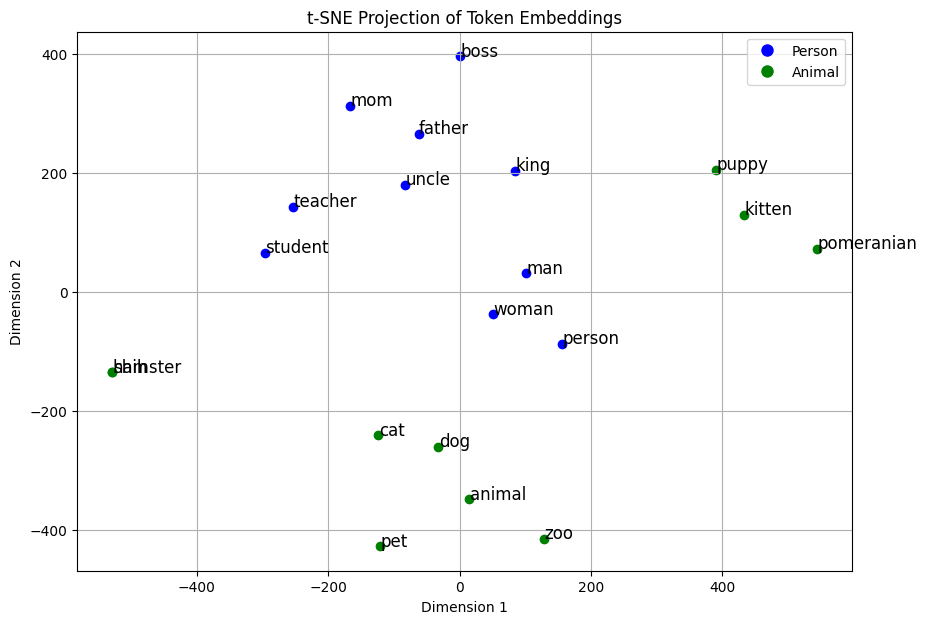

In [ ]:
# 📦 Install necessary libraries (only needed in Colab)
!pip install transformers --quiet
!pip install scikit-learn matplotlib --quiet

# 🔧 Imports
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 💾 Load tokenizer and model (we'll use BERT-base)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 🧠 Get the input embedding matrix (not contextual)
embedding_matrix = model.embeddings.word_embeddings.weight.detach()  # shape: [vocab_size, hidden_dim]

# 🗂️ Define your word groups
person_words = ["king", "father", "teacher", "student", "man", "woman", "person", "mom", "boss", "uncle"]
animal_words = ["dog", "cat", "puppy", "kitten", "pomeranian", "shih", "zoo", "animal", "pet", "hamster"]

all_words = person_words + animal_words

# 🔍 Convert to token IDs and get embeddings
token_ids = tokenizer.convert_tokens_to_ids(all_words)
word_vecs = embedding_matrix[token_ids].numpy()  # shape: [num_words, hidden_dim]

# 📐 Cosine similarity matrix
cos_sim = cosine_similarity(word_vecs)
# 🔢 Display cosine similarity
print("\nCosine Similarity Matrix:")
print(f"{'':>10}" + "".join([f"{w[:6]:>10}" for w in all_words]))
for i, w1 in enumerate(all_words):
    row = "".join([f"{cos_sim[i][j]:10.2f}" for j in range(len(all_words))])
    print(f"{w1[:10]:>10}{row}")

# 📊 Use t-SNE to reduce dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(word_vecs)

# 🎨 Plot
plt.figure(figsize=(10, 7))
for i, word in enumerate(all_words):
    color = 'blue' if word in person_words else 'green'
    plt.scatter(reduced[i, 0], reduced[i, 1], color=color)
    plt.text(reduced[i, 0] + 0.5, reduced[i, 1] + 0.5, word, fontsize=12)

plt.title("t-SNE Projection of Token Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Person', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Animal', markerfacecolor='green', markersize=10)
])
plt.show()


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# List of words to inspect
words = ["How", "are", "you"]

# Access embedding matrix: [vocab_size, hidden_dim]
embedding_matrix = model.embeddings.word_embeddings.weight  # Shape: [30522, 768]

# Iterate over each word
for word in words:
    token = tokenizer.tokenize(word)
    token_id = tokenizer.convert_tokens_to_ids(token)[0]
    embedding_vector = embedding_matrix[token_id].detach().numpy()

    print("="*80)
    print(f"📌 Word: {word}")
    print(f"🧩 Tokenized: {token}")
    print(f"🔢 Token ID: {token_id}")
    print(f"🔷 Static Embedding Vector (shape: {embedding_vector.shape}):\n")
    print(embedding_vector)


📌 Word: How
🧩 Tokenized: ['how']
🔢 Token ID: 2129
🔷 Static Embedding Vector (shape: (768,)):

[-2.40632426e-02  3.17239240e-02 -7.56581724e-02  6.26911037e-03
 -2.58011918e-04 -4.89562452e-02 -8.62864181e-02 -1.48444436e-02
  2.95870882e-02 -2.93501709e-02 -1.86109450e-02 -2.58933883e-02
  4.38467599e-02  5.06787337e-02 -2.69273855e-02 -9.60835367e-02
  2.47513223e-02 -1.66852530e-02  4.85536605e-02  1.61708891e-02
 -1.12872068e-02  2.37299539e-02 -8.33070744e-03 -3.69310901e-02
 -2.43126173e-02 -5.99710383e-02 -1.38285588e-02 -7.60446936e-02
  7.07411915e-02 -2.73569897e-02 -3.67836654e-02 -7.62912259e-02
 -8.92018452e-02  6.45733774e-02 -3.21142282e-03 -3.13841812e-02
 -7.32790530e-02 -2.19877567e-02 -4.54654545e-03 -5.16635329e-02
 -8.74689315e-03  1.45732490e-02 -8.29743370e-02  6.72775134e-02
  3.09977941e-02  4.56132321e-03  2.29086820e-02 -3.61224562e-02
  3.17416489e-02  1.83614213e-02 -4.02215775e-03 -4.04329039e-02
  3.96960974e-03  5.34170587e-03 -1.11106066e-02  9.45139024e

# contextual embedding

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# Sentences with "bank" in different contexts
sentences = [
    "He sat by the river bank.",
    "She deposited money at the bank."
]

# Access the static embedding matrix: [vocab_size, hidden_dim]
embedding_matrix = model.embeddings.word_embeddings.weight  # shape: [30522, 768]

# Store results
results = []

for sent in sentences:
    # Tokenize and encode
    inputs = tokenizer(sent, return_tensors="pt")
    input_ids = inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    # Run through BERT to get contextual embeddings
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state  # [1, seq_len, 768]

    # Find index and token ID for "bank"
    for idx, token in enumerate(tokens):
        if "bank" in token:
            bank_token_id = input_ids[idx].item()
            static_emb = embedding_matrix[bank_token_id].detach().numpy()[:5]
            contextual_emb = last_hidden_state[0, idx, :5].detach().numpy()
            results.append({
                "sentence": sent,
                "token": token,
                "token_id": bank_token_id,
                "static_embedding": static_emb,
                "contextual_embedding": contextual_emb
            })

# 🖨️ Output
print("="*80)
print("🔍 Comparison of Static vs Contextual Embeddings for the Word 'bank'\n")

for r in results:
    print(f"📌 Input Sentence: {r['sentence']}")
    print(f"🔢 'bank' Token ID: {r['token_id']}")
    print(f"🧊 Static Embedding (first 5 dims): {r['static_embedding'].tolist()}")
    print(f"🔥 Contextual Embedding (first 5 dims): {r['contextual_embedding'].tolist()}")
    print("-"*80)


🔍 Comparison of Static vs Contextual Embeddings for the Word 'bank'

📌 Input Sentence: He sat by the river bank.
🔢 'bank' Token ID: 2924
🧊 Static Embedding (first 5 dims): [-0.019130440428853035, -0.0645589530467987, -0.09128748625516891, -0.07761748880147934, -0.025318529456853867]
🔥 Contextual Embedding (first 5 dims): [0.1599486917257309, -0.3381432890892029, -0.03246789425611496, -0.08658606559038162, -0.39891570806503296]
--------------------------------------------------------------------------------
📌 Input Sentence: She deposited money at the bank.
🔢 'bank' Token ID: 2924
🧊 Static Embedding (first 5 dims): [-0.019130440428853035, -0.0645589530467987, -0.09128748625516891, -0.07761748880147934, -0.025318529456853867]
🔥 Contextual Embedding (first 5 dims): [0.393318772315979, -0.4198230504989624, -0.2934713363647461, 0.019461048766970634, 0.853203296661377]
--------------------------------------------------------------------------------


# Sentencce Embedding

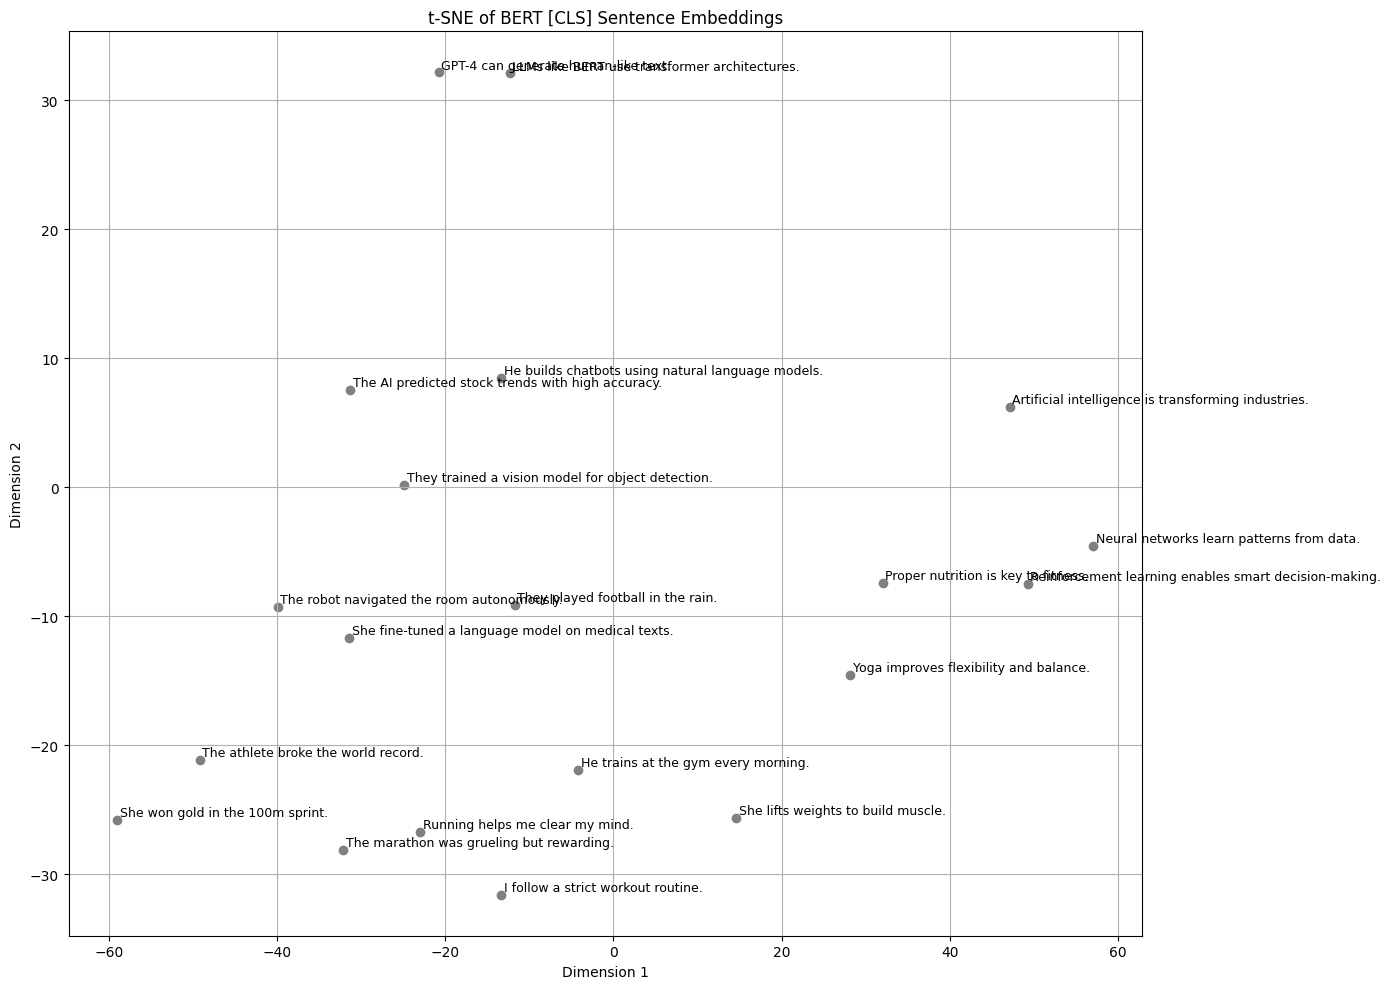

In [ ]:
# # 📦 Install necessary libraries
# !pip install transformers --quiet
# !pip install scikit-learn matplotlib --quiet

# 🔧 Imports
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 💾 Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# 📝 Define sentences (10 about sports/fitness, 10 about AI/tech — hidden from students)
sentences = [
    "He trains at the gym every morning.",
    "The marathon was grueling but rewarding.",
    "She lifts weights to build muscle.",
    "They played football in the rain.",
    "Running helps me clear my mind.",
    "The athlete broke the world record.",
    "I follow a strict workout routine.",
    "Yoga improves flexibility and balance.",
    "She won gold in the 100m sprint.",
    "Proper nutrition is key to fitness.",
    "Artificial intelligence is transforming industries.",
    "He builds chatbots using natural language models.",
    "Neural networks learn patterns from data.",
    "GPT-4 can generate human-like text.",
    "The robot navigated the room autonomously.",
    "They trained a vision model for object detection.",
    "Reinforcement learning enables smart decision-making.",
    "She fine-tuned a language model on medical texts.",
    "The AI predicted stock trends with high accuracy.",
    "LLMs like BERT use transformer architectures."
]

# 🧠 Get [CLS] token embeddings
sentence_embeddings = []
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[0, 0, :].numpy()
    sentence_embeddings.append(cls_embedding)

sentence_embeddings = np.array(sentence_embeddings)

# 📊 t-SNE projection
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(sentence_embeddings)

# 🎨 Plot with full sentence text
plt.figure(figsize=(14, 10))
for i, (x, y) in enumerate(reduced):
    plt.scatter(x, y, color='gray')
    plt.text(x + 0.3, y + 0.3, sentences[i], fontsize=9)

plt.title("t-SNE of BERT [CLS] Sentence Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-78932527.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20')  # 20 unique colors


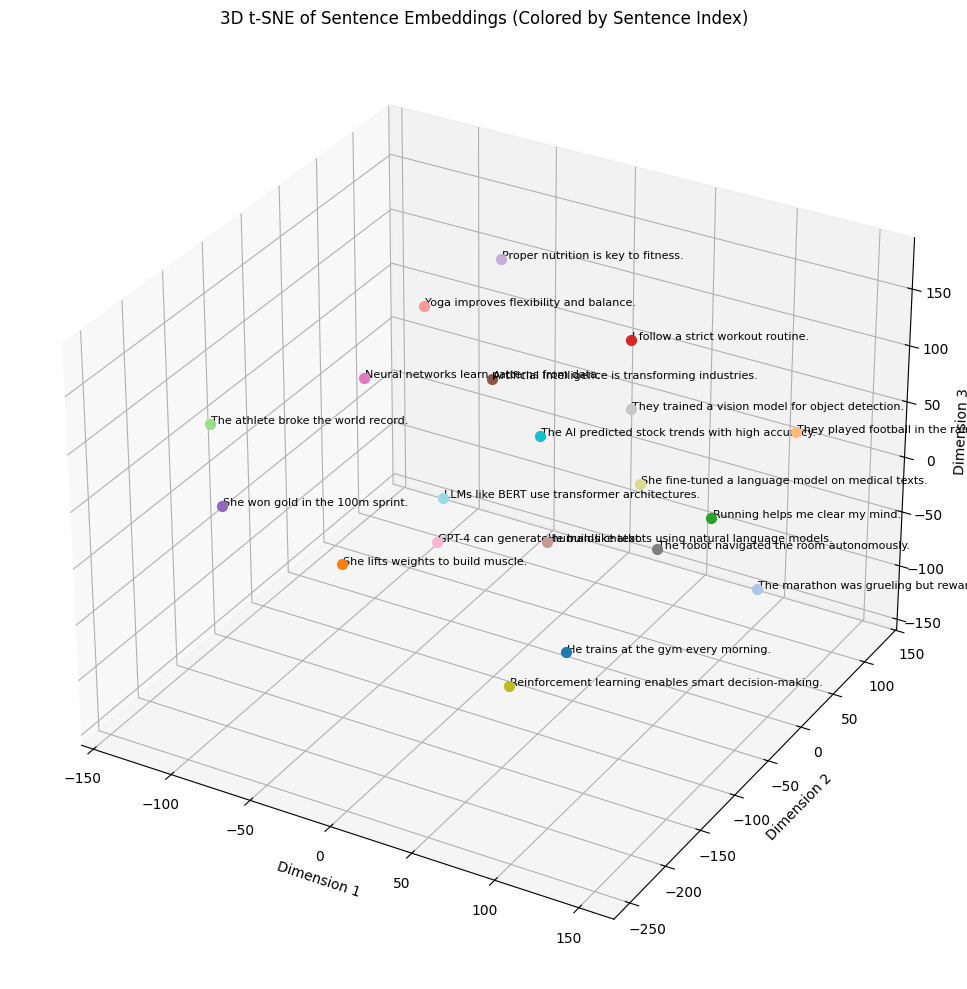

In [ ]:
# # 📦 Install required libraries
# !pip install transformers --quiet
# !pip install scikit-learn matplotlib --quiet

# 🔧 Imports
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# 💾 Load BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# 📝 Define sentences (students don’t know the categories)
sentences = [
    "He trains at the gym every morning.",
    "The marathon was grueling but rewarding.",
    "She lifts weights to build muscle.",
    "They played football in the rain.",
    "Running helps me clear my mind.",
    "The athlete broke the world record.",
    "I follow a strict workout routine.",
    "Yoga improves flexibility and balance.",
    "She won gold in the 100m sprint.",
    "Proper nutrition is key to fitness.",
    "Artificial intelligence is transforming industries.",
    "He builds chatbots using natural language models.",
    "Neural networks learn patterns from data.",
    "GPT-4 can generate human-like text.",
    "The robot navigated the room autonomously.",
    "They trained a vision model for object detection.",
    "Reinforcement learning enables smart decision-making.",
    "She fine-tuned a language model on medical texts.",
    "The AI predicted stock trends with high accuracy.",
    "LLMs like BERT use transformer architectures."
]

# 🧠 Extract [CLS] token embeddings
sentence_embeddings = []
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[0, 0, :].numpy()
    sentence_embeddings.append(cls_embedding)

sentence_embeddings = np.array(sentence_embeddings)

# 📊 3D t-SNE projection
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
reduced = tsne.fit_transform(sentence_embeddings)

# 🎨 Assign a unique color to each point
cmap = cm.get_cmap('tab20')  # 20 unique colors
colors = [cmap(i) for i in range(len(sentences))]

# 🖼️ 3D Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for i, (x, y, z) in enumerate(reduced):
    ax.scatter(x, y, z, color=colors[i], s=50)
    ax.text(x + 0.5, y + 0.5, z + 0.5, sentences[i], fontsize=8)

ax.set_title("3D t-SNE of Sentence Embeddings (Colored by Sentence Index)")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.tight_layout()
plt.show()
